# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

# Project Explanation - Thomas Kulch

In this project, I will be analyzing data from the telecom operator Megaline. I have data files containing some general information on a sample of users and their call, internet, and messaging behavior.

 I will start by loading and preparing the data for analysis, followed by analyzing the customers behavior, and test some hypotheses to help come to a conclusion on which phone plan generates more revenue for Megaline and where their advertising budgets should be allocated. 

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


## Load data

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv("/datasets/megaline_calls.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")
users = pd.read_csv("/datasets/megaline_users.csv")

#all files have a comma delimiter so no need to change that

In [3]:
#create a function to take one of the files as an input and print out the information on the data and if it has any duplicates
#in the id column
def info_dups(file):
    file.info()
    print()
    display(file.sample(10))
    print()
    print(f'Duplicates in id: ',file['id'].duplicated().sum())
    
    
info_dups(calls)
info_dups(internet)
info_dups(messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB



,id,user_id,call_date,duration
24649,1094_1113,1094,2018-12-02,0.00
15525,1061_467,1061,2018-05-18,12.00
110814,1390_263,1390,2018-08-17,10.42
21068,1077_1035,1077,2018-07-31,15.57
20929,1077_896,1077,2018-11-11,3.44
5312,1023_44,1023,2018-08-10,10.17
81879,1295_208,1295,2018-09-05,23.07
88656,1324_712,1324,2018-05-03,3.53
130798,1470_247,1470,2018-09-17,2.03
98050,1352_311,1352,2018-09-09,0.00



Duplicates in id:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB



,id,user_id,session_date,mb_used
90320,1416_50,1416,2018-11-17,137.51
71148,1332_121,1332,2018-09-22,543.83
12606,1061_103,1061,2018-09-22,0.00
4745,1028_305,1028,2018-11-21,645.29
66697,1311_502,1311,2018-09-07,0.00
41283,1185_320,1185,2018-10-23,169.82
59587,1268_256,1268,2018-07-03,480.02
24904,1114_282,1114,2018-10-19,946.98
67820,1316_30,1316,2018-06-02,367.97
84568,1394_110,1394,2018-12-07,275.94



Duplicates in id:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB



,id,user_id,message_date
20539,1130_214,1130,2018-10-20
60413,1381_526,1381,2018-11-21
72978,1470_606,1470,2018-07-25
54066,1343_150,1343,2018-10-10
21294,1132_576,1132,2018-10-30
43346,1287_20,1287,2018-11-24
17260,1114_39,1114,2018-12-31
7803,1060_139,1060,2018-10-21
68861,1446_11,1446,2018-12-31
56198,1355_277,1355,2018-11-23



Duplicates in id:  0


Based on the information from the calls, internet, and messages files, there's no missing values or duplicates.
The column names all look good too.
The plans file only has two rows and it's easy to tell there are no missing values or duplicates/


## Prepare the data

## Plans

In [4]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
# Print a sample of data for plans
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Issues with the data:** I don't see anything too glaring, but I would change the usd_monthly_pay and usd_per_gb costs 
to float because I feel it's better to look at price as a float. 

I will also add a column to display how many gigabytes
of internet are included in the plan each month

## Fix data

In [6]:
#changing the data type of the usd_monthly_pay and usd_per_gb costs to float because I feel it's better to look at price as a float.
plans['usd_monthly_pay'] = plans['usd_monthly_pay'].astype(float)
plans['usd_per_gb'] = plans['usd_per_gb'].astype(float)

## Enrich data

In [7]:
#adding the gb_per_month_included column to show how many gigabytes are included in the plan incase we need it.
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0


## Users

In [8]:
# Print the general/summary information about the users' DataFrame
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
# Print a sample of data for users
users.head(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [10]:
#checking the users dataframe to see if there are any duplicate first/last name combos living in the same city
display(users.duplicated(subset=['first_name','last_name','city']).sum())

#or any first/last name duplicates that we might want to look at
display(users.duplicated(subset=['first_name','last_name']).sum())

0

0

**Issues with the Data**: The churn_date jumps out at me immediately, but based on the description, it should be okay to leave these missing values as NaN since the users are still using the service.

We will want to convert the churn_date and reg_date fields to datetime, and in the city column, we need to split the MSA from the values and separate the city and state into their own columns for better analysis. We also want to get rid of the quotations in the city column.

### Fix Data

In [11]:
#get rid of quotations in city field
users['city'] = users['city'].str.replace('"','')

#get rid of MSA at the end of values in city field
users['city'] = users['city'].str.replace(' MSA','')

#convert date columns to datetime from object
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

### Enrich Data

In [12]:
#split city and state into their own columns
users[['city','state']] = users['city'].str.split(',',expand=True)
#creating month and year columns from call_date
users['reg_year'] = users['reg_date'].dt.year
users['reg_month'] = users['reg_date'].dt.month

## Calls

In [13]:
# Print the general/summary information about the calls' DataFrame
info_dups(calls)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB



,id,user_id,call_date,duration
810,1004_327,1004,2018-07-22,20.43
55577,1199_181,1199,2018-10-16,0.83
16390,1064_248,1064,2018-11-05,5.05
136281,1494_123,1494,2018-12-25,0.00
133943,1487_52,1487,2018-12-22,6.67
13237,1057_116,1057,2018-10-09,6.45
94934,1336_874,1336,2018-06-12,6.28
85036,1313_16,1313,2018-12-09,19.79
5372,1024_52,1024,2018-12-29,6.42
86190,1318_19,1318,2018-12-21,0.00



Duplicates in id:  0


**Issues with the Data**: The only problem I see here is the call_date is not in datetime format

### Fix data

In [14]:
#convert date columns to datetime from object
calls['call_date'] = pd.to_datetime(calls['call_date'])

### Enrich data

In [15]:
#creating month and year columns from call_date
calls['year'] = calls['call_date'].dt.year
calls['month'] = calls['call_date'].dt.month

## Messages

In [16]:
# Print the general/summary information about the messages' DataFrame
info_dups(messages)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB



,id,user_id,message_date
39879,1258_336,1258,2018-12-03
4810,1045_7,1045,2018-11-10
48858,1326_395,1326,2018-10-25
34130,1215_44,1215,2018-11-06
53883,1341_159,1341,2018-12-22
28153,1173_301,1173,2018-10-29
20204,1128_173,1128,2018-11-06
51745,1335_336,1335,2018-12-20
55452,1348_347,1348,2018-12-13
7152,1059_22,1059,2018-05-03



Duplicates in id:  0


### Fix data

In [17]:
#convert date columns to datetime from object
messages['message_date'] = pd.to_datetime(messages['message_date'])

### Enrich data

In [18]:
#creating month and year columns from message_date
messages['year'] = messages['message_date'].dt.year
messages['month'] = messages['message_date'].dt.month

## Internet

In [19]:
# Print the general/summary information about the internet DataFrame
info_dups(internet)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB



,id,user_id,session_date,mb_used
46396,1206_198,1206,2018-12-22,677.55
23082,1106_355,1106,2018-08-07,251.48
23541,1109_119,1109,2018-11-11,0.00
73570,1346_151,1346,2018-12-31,591.97
10597,1054_131,1054,2018-06-14,293.97
16519,1073_467,1073,2018-05-07,916.59
88879,1409_190,1409,2018-10-13,619.60
74180,1347_275,1347,2018-11-29,1159.27
6137,1033_198,1033,2018-12-24,705.71
38228,1171_599,1171,2018-09-25,27.91



Duplicates in id:  0


### Fix data

In [20]:
#convert date columns to datetime from object
internet['session_date'] = pd.to_datetime(internet['session_date'])

### Enrich data

In [21]:
#creating month and year columns from message_date
internet['year'] = internet['session_date'].dt.year
internet['month'] = internet['session_date'].dt.month

## Study plan conditions

In [22]:
# Print out the plan conditions to use as reference
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0


## Aggregate data per user


In [23]:
# Calculate the number of calls made by each user per month. Save the result.
#group the calls dataframe by the user_id and month and get the counts of calls. reset the index to num_calls
monthly_calls = calls.groupby(['user_id','month']).size().reset_index(name='num_calls')

#group the new dataframe by user_id and get the mean of the number of calls we calculated and call that column avg_calls_per_month
avg_calls_per_month = monthly_calls.groupby('user_id')['num_calls'].mean().reset_index(name='avg_calls_per_month')

display(monthly_calls.head(5))
display(avg_calls_per_month.head(5))

,user_id,month,num_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


,user_id,avg_calls_per_month
0,1000,16.000000
1,1001,52.200000
2,1002,37.666667
3,1003,149.000000
4,1004,46.250000


In [24]:
# Calculate the amount of minutes spent by each user per month. Save the result.

#round the duration 
calls.duration = np.ceil(calls.duration)
#group the calls column by user_id and month again, but this time sum all the minutes for each month by user.
monthly_min = calls.groupby(['user_id','month'])['duration'].sum().reset_index(name='minutes_sum')

#group the new dataframe by user_id and get the mean of their minutes per month.
avg_minutes_per_month = monthly_min.groupby('user_id')['minutes_sum'].mean().reset_index(name='average_minutes_per_month')

In [25]:
# Calculate the number of messages sent by each user per month. Save the result.
#group the messsages dataframe by the user_id and month and get the counts of messages. reset the index to num_messages
monthly_messages = messages.groupby(['user_id','month']).size().reset_index(name='num_messages')

#group the new dataframe by user_id and get the mean of their messages per month.
avg_messages_per_month = monthly_messages.groupby('user_id')['num_messages'].mean().reset_index(name='avg_messages_per_month')

#print a sample to make sure we have the result we want
display(monthly_messages.sample(5))
display(avg_messages_per_month.sample(5))

,user_id,month,num_messages
1333,1358,6,3
1199,1327,8,1
594,1160,11,10
695,1188,10,43
59,1027,7,18


,user_id,avg_messages_per_month
217,1264,62.5
36,1046,34.0
228,1279,21.0
127,1161,2.0
370,1458,29.0


In [26]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
#group the mb_used column by user_id and month again, but this time sum all the mb for each month by user.
monthly_mb = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index(name='mb_sum')

#group the new dataframe by user_id and get the mean of their mb per month.
avg_minutes_per_month = monthly_mb.groupby('user_id')['mb_sum'].mean().reset_index(name='avg_mb_per_month')

#print a sample to make sure we have the result we want
display(monthly_mb.sample(5))
display(avg_minutes_per_month.sample(5))


,user_id,month,mb_sum
1839,1397,11,17428.53
1290,1274,12,17346.08
1895,1406,6,17191.12
1040,1217,12,18019.31
1416,1310,12,20970.26


,user_id,avg_mb_per_month
172,1175,18816.113333
342,1349,14420.573333
311,1317,12656.350000
72,1073,14317.625556
38,1039,18260.484286


In [27]:
# Reviwer's code 2

display(monthly_mb.head())
monthly_mb.tail()

,user_id,month,mb_sum
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


,user_id,month,mb_sum
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83
2276,1499,12,22059.21


In [28]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
agg_df = monthly_mb.merge(monthly_min,how='outer', on=['user_id','month']).merge(monthly_messages,how='outer',on=['user_id','month']).merge(monthly_calls,how='outer',on=['user_id','month'])

#check if there are any missing values and check a sample
display(agg_df.sample(5))
agg_df.info()

,user_id,month,mb_sum,minutes_sum,num_messages,num_calls
1910,1408,8,17535.93,386.0,49.0,63.0
250,1058,11,7828.96,566.0,29.0,76.0
607,1128,10,19870.93,35.0,37.0,5.0
320,1069,9,8293.23,218.0,51.0,26.0
1178,1251,7,22913.54,590.0,39.0,88.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       2293 non-null   int64  
 1   month         2293 non-null   int64  
 2   mb_sum        2277 non-null   float64
 3   minutes_sum   2258 non-null   float64
 4   num_messages  1806 non-null   float64
 5   num_calls     2258 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 125.4 KB


In [29]:
# Calculate the monthly revenue for each user

#create a big dataframe containing all the aggregate data and plan conditions for each user
merged_df = users.merge(agg_df,on='user_id').merge(plans,left_on='plan',right_on='plan_name')

#check to make sure everything looks right
merged_df.info()
display(merged_df.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   first_name             2293 non-null   object        
 2   last_name              2293 non-null   object        
 3   age                    2293 non-null   int64         
 4   city                   2293 non-null   object        
 5   reg_date               2293 non-null   datetime64[ns]
 6   plan                   2293 non-null   object        
 7   churn_date             158 non-null    datetime64[ns]
 8   state                  2293 non-null   object        
 9   reg_year               2293 non-null   int64         
 10  reg_month              2293 non-null   int64         
 11  month                  2293 non-null   int64         
 12  mb_sum                 2277 non-null   float64       
 13  min

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,reg_year,...,num_calls,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA,2018,...,16.0,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0
1,1006,Jesusa,Bradford,73,San Francisco-Oakland-Berkeley,2018-11-27,ultimate,2018-12-18,CA,2018,...,2.0,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0
2,1006,Jesusa,Bradford,73,San Francisco-Oakland-Berkeley,2018-11-27,ultimate,2018-12-18,CA,2018,...,9.0,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0
3,1008,Emely,Hoffman,53,Orlando-Kissimmee-Sanford,2018-08-03,ultimate,NaT,FL,2018,...,71.0,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0
4,1008,Emely,Hoffman,53,Orlando-Kissimmee-Sanford,2018-08-03,ultimate,NaT,FL,2018,...,63.0,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0


In [30]:
#calculate extra minutes,data usage and messages
extra_minutes = merged_df['minutes_sum'] - merged_df['minutes_included']

extra_internet = np.ceil((merged_df['mb_sum'] / 1024)) - merged_df['gb_per_month_included']

extra_messages = merged_df['num_messages'] - merged_df['messages_included']

In [31]:
#create columns in the merged dataframe where if the extra_ is greater than 0, we will multiple that value with the extra cost
#associated with the penalty, else 0. The last column will add up all of these along with the base plan cost into total_revenue.

#This will give us the revenue each month by user.
merged_df['extra_minutes_cost'] = np.where(extra_minutes > 0, extra_minutes*merged_df['usd_per_minute'],0)

merged_df['extra_internet_cost'] = np.where(extra_internet > 0, extra_internet*merged_df['usd_per_gb'],0)

merged_df['extra_messages_cost'] = np.where(extra_messages > 0, extra_messages*merged_df['usd_per_message'],0)

merged_df['total_revenue'] = (merged_df['usd_monthly_pay'] + 
                             merged_df['extra_minutes_cost'] + 
                             merged_df['extra_internet_cost'] +
                             merged_df['extra_messages_cost'])

#check to make sure everything looks right
merged_df.info()
display(merged_df.sample(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   first_name             2293 non-null   object        
 2   last_name              2293 non-null   object        
 3   age                    2293 non-null   int64         
 4   city                   2293 non-null   object        
 5   reg_date               2293 non-null   datetime64[ns]
 6   plan                   2293 non-null   object        
 7   churn_date             158 non-null    datetime64[ns]
 8   state                  2293 non-null   object        
 9   reg_year               2293 non-null   int64         
 10  reg_month              2293 non-null   int64         
 11  month                  2293 non-null   int64         
 12  mb_sum                 2277 non-null   float64       
 13  min

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,reg_year,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,extra_minutes_cost,extra_internet_cost,extra_messages_cost,total_revenue
1591,1267,Gia,Parker,53,St. Louis,2018-03-12,surf,NaT,MO-IL,2018,...,20.0,10.0,0.03,0.03,surf,15.0,30.3,220.0,2.25,272.55
1109,1120,Abraham,Mcconnell,33,New York-Newark-Jersey City,2018-04-03,surf,NaT,NY-NJ-PA,2018,...,20.0,10.0,0.03,0.03,surf,15.0,0.0,80.0,0.00,100.00
822,1044,Devora,Galloway,74,Albuquerque,2018-08-30,surf,NaT,NM,2018,...,20.0,10.0,0.03,0.03,surf,15.0,0.0,0.0,0.00,20.00
453,1346,Emmie,Gonzalez,59,Tucson,2018-04-26,ultimate,NaT,AZ,2018,...,70.0,7.0,0.01,0.01,ultimate,30.0,0.0,0.0,0.00,70.00
2243,1488,Shirley,Jones,29,Baton Rouge,2018-05-15,surf,NaT,LA,2018,...,20.0,10.0,0.03,0.03,surf,15.0,7.2,80.0,0.00,107.20


In [32]:
#group the whole dataframe by user_id and get the mean of the total revenue for each month to get 
user_monthly_revenue = merged_df.groupby('user_id')['total_revenue'].mean().reset_index(name='avg_monthly_revenue')

display(user_monthly_revenue.sample(5))

,user_id,avg_monthly_revenue
472,1482,70.000
25,1026,70.000
165,1168,20.000
177,1180,24.230
96,1097,49.052


## Study user behaviour

### Calls

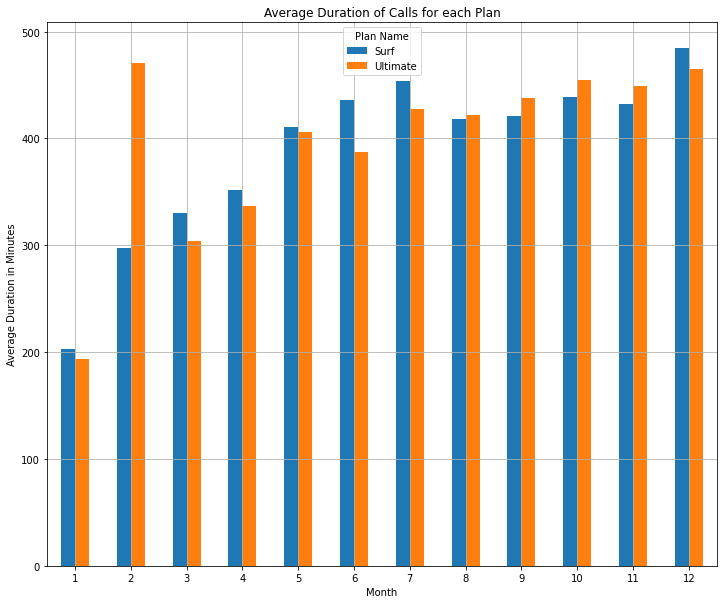

In [33]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plot to visualize it.
avg_duration = merged_df.groupby(['plan_name','month'])['minutes_sum'].mean().reset_index(name='avg_minutes_per_month')

#Create a pivot of the avg_duration dataframe that has the plan names as the indexes so we can plot them on the same
#bar graph and have the X axis be months and y be avg minutes.
pivot_df = avg_duration.pivot(index='plan_name', columns='month', values='avg_minutes_per_month').T

pivot_df.plot(kind='bar',
              figsize=(12,10),
              rot=0,
              title='Average Duration of Calls for each Plan',
              xlabel='Month',
              ylabel = 'Average Duration in Minutes',
              grid=True)
plt.legend(title = 'Plan Name',labels=['Surf','Ultimate'])
plt.show()

Based on this bar graph, despite the ultimate users having more minutes available for calling, they do not use anywhere near the amount allowed and on average use the same amount of minutes as the surf users.

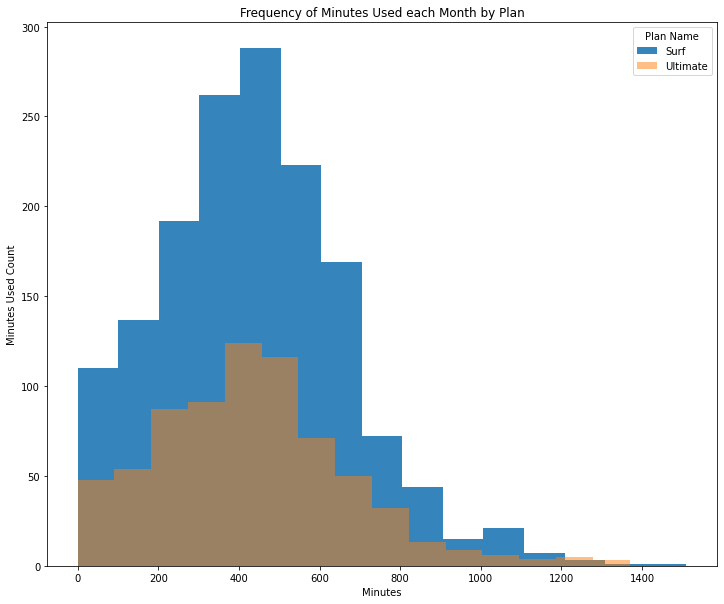

In [34]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
#create two dataframes to split up the surf and ultimate users in merged_df
merged_df_surf = merged_df[merged_df.plan_name == 'surf']
merged_df_ult = merged_df[merged_df.plan_name == 'ultimate']


merged_df_surf['minutes_sum'].plot(kind='hist',figsize=[12,10],bins=15,legend=True,alpha=0.9,title='Frequency of Minutes Used each Month by Plan')
merged_df_ult['minutes_sum'].plot(kind='hist',figsize=[12,10],bins=15,alpha=0.5)

plt.legend(title = 'Plan Name',labels=['Surf','Ultimate'])
plt.xlabel('Minutes')
plt.ylabel('Minutes Used Count')
plt.show()

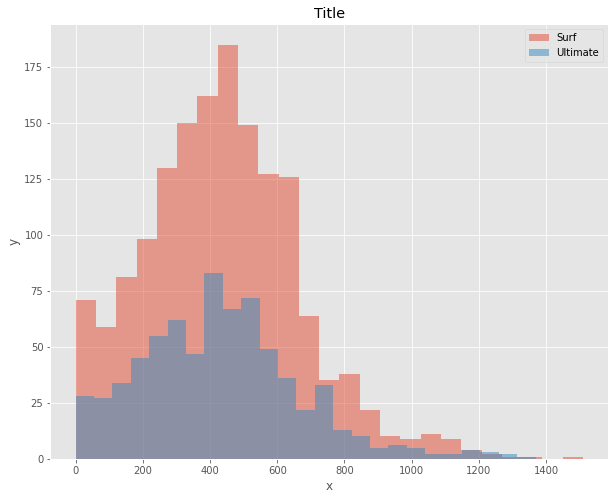

In [35]:
# # Reviewer's code 2

plt.style.use('ggplot') # Add style. You can put it in the very first cell, after plt is defined.

merged_df.groupby('plan_name')['minutes_sum'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Surf', 'Ultimate'])
plt.title('Title')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Based on the above histogram, most users of each plan hover around the 300 to 700 minutes used range.

Ultimate users do not use as many minutes as Surf users. A lot of Surf users tend to go over their minutes limit meaning they would benefit from upgrading to Ultimate.

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [36]:
# calculating mean and variance

#create a variable to display the statistics for any given field
def statistics(metric):
    print('Surf Users Mean: \n',merged_df_surf[metric].mean())
    print()
    print('Surf Users Variance: \n',merged_df_surf[metric].var())
    print()
    print('Surf Users Standard Deviation: \n',merged_df_surf[metric].std())
    print('-----------------------------------')
    print('Ultimate Users Mean: \n',merged_df_ult[metric].mean())
    print()
    print('Ultimate Users Variance: \n',merged_df_ult[metric].var())
    print()
    print('Ultimate Users Standard Deviation: \n',merged_df_ult[metric].std())
    
statistics('minutes_sum')

Surf Users Mean: 
 436.51974110032364

Surf Users Variance: 
 52571.06324345624

Surf Users Standard Deviation: 
 229.28380501783428
-----------------------------------
Ultimate Users Mean: 
 434.67601683029454

Ultimate Users Variance: 
 56573.63224703343

Ultimate Users Standard Deviation: 
 237.8521226456334


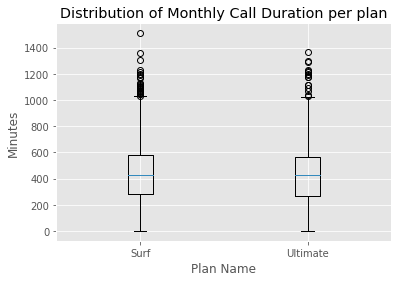

Surf Users Mean: 
 436.51974110032364

Surf Users Variance: 
 52571.06324345624

Surf Users Standard Deviation: 
 229.28380501783428
-----------------------------------
Ultimate Users Mean: 
 434.67601683029454

Ultimate Users Variance: 
 56573.63224703343

Ultimate Users Standard Deviation: 
 237.8521226456334


In [37]:
# Plot a boxplot to visualize the distribution of the monthly call duration
#create dataframes taking just the minutes_sum field and then filter so the NaN values are removed.
merged_df_surf_duration = merged_df_surf['minutes_sum']
merged_df_ult_duration = merged_df_ult['minutes_sum']

merged_df_surf_duration_filtered = merged_df_surf_duration[~np.isnan(merged_df_surf_duration)]
merged_df_ult_duration_filtered = merged_df_ult_duration[~np.isnan(merged_df_ult_duration)]

plt.boxplot([merged_df_surf_duration_filtered, merged_df_ult_duration_filtered], labels=['Surf', 'Ultimate'])
plt.title('Distribution of Monthly Call Duration per plan')
plt.xlabel('Plan Name')
plt.ylabel('Minutes')
plt.show()

#show the statistics
statistics('minutes_sum')

Based on the box plots, the behavior between each plan is not very different. Both plans have similar medians and Surf users have more outliers. Some of them would benefit from upgrading to Ultimate.

### Messages

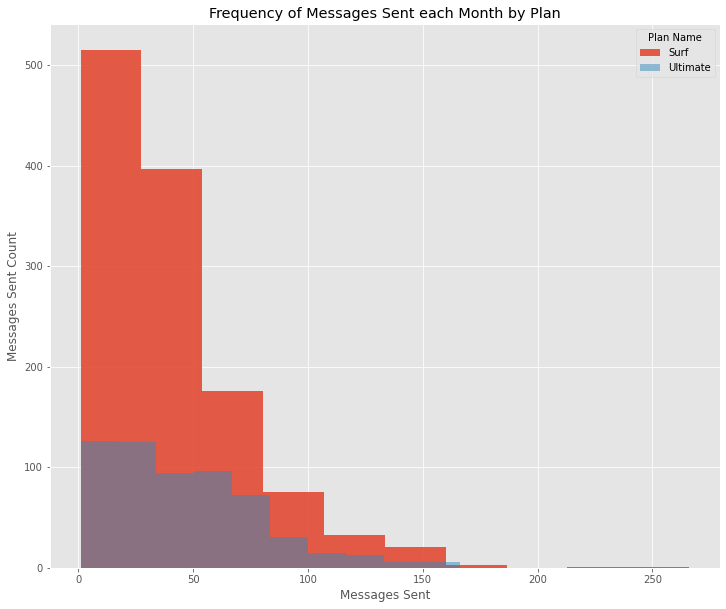

In [38]:
# Compare the number of messages users of each plan tend to send each month

merged_df_surf['num_messages'].plot(kind='hist',figsize=[12,10],bins=10,legend=True,alpha=0.9,title='Frequency of Messages Sent each Month by Plan')
merged_df_ult['num_messages'].plot(kind='hist',figsize=[12,10],bins=10,alpha=0.5)


plt.legend(title = 'Plan Name',labels=['Surf','Ultimate'])
plt.xlabel('Messages Sent')
plt.ylabel('Messages Sent Count')
plt.show()


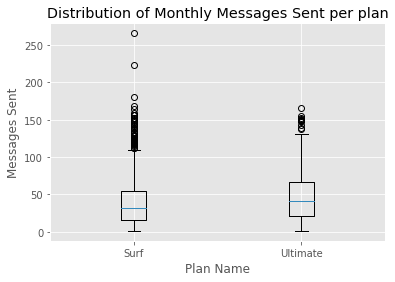

Surf Users Mean: 
 40.10965630114566

Surf Users Variance: 
 1091.3442310038054

Surf Users Standard Deviation: 
 33.03549955735202
-----------------------------------
Ultimate Users Mean: 
 46.29623287671233

Ultimate Users Variance: 
 1085.183107568317

Ultimate Users Standard Deviation: 
 32.942117533156804


In [39]:
# Plot a boxplot to visualize the distribution of the monthly messages sent
#create dataframes taking just the num_messages field and then filter so the NaN values are removed.
merged_df_surf_minutes = merged_df_surf['num_messages']
merged_df_ult_minutes = merged_df_ult['num_messages']

merged_df_surf_minutes_filtered = merged_df_surf_minutes[~np.isnan(merged_df_surf_minutes)]
merged_df_ult_minutes_filtered = merged_df_ult_minutes[~np.isnan(merged_df_ult_minutes)]


plt.boxplot([merged_df_surf_minutes_filtered, merged_df_ult_minutes_filtered], labels=['Surf', 'Ultimate'])
plt.title('Distribution of Monthly Messages Sent per plan')
plt.xlabel('Plan Name')
plt.ylabel('Messages Sent')
plt.show()

#display statistics
statistics('num_messages')

Based on the bar plot, we can see that Surf users tend to not text much, but there are a good amount of users that go over their 50 messages limit and would likely benefit from an upgrade.

From the box plot, we can see that there are a lot of outliers in the Surf users distribution, but their median is below the 50 messages limit. Ultimate users send more messages, but do not usually go overboard.

In [42]:
# Reviewer's code 3

merged_df.pivot_table(index='plan', values=['minutes_sum', 'num_messages', 'mb_sum'],
                       aggfunc=['mean', 'std', 'var'])

mean                                   std              \
                mb_sum minutes_sum num_messages       mb_sum minutes_sum   
plan                                                                       
surf      16717.702137  436.519741    40.109656  7884.682983  229.283805   
ultimate  17238.642253  434.676017    46.296233  7831.018323  237.852123   

                                var                             
         num_messages        mb_sum   minutes_sum num_messages  
plan                                                            
surf        33.035500  6.216823e+07  52571.063243  1091.344231  
ultimate    32.942118  6.132485e+07  56573.632247  1085.183108

### Internet

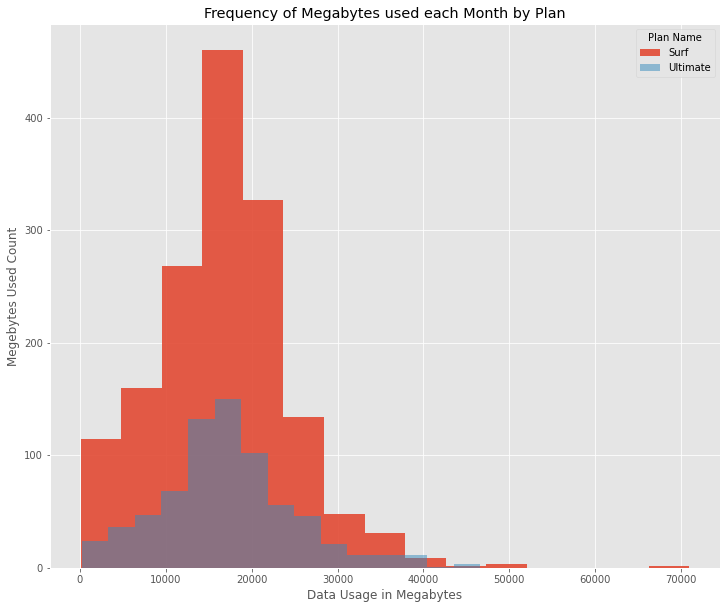

In [40]:
# Compare the amount of data users of each plan tend to use each month

merged_df_surf['mb_sum'].plot(kind='hist',figsize=[12,10],bins=15,legend=True,alpha=0.9,title='Frequency of Megabytes used each Month by Plan')
merged_df_ult['mb_sum'].plot(kind='hist',figsize=[12,10],bins=15,alpha=0.5)


plt.legend(title = 'Plan Name',labels=['Surf','Ultimate'])
plt.xlabel('Data Usage in Megabytes')
plt.ylabel('Megebytes Used Count')
plt.show()

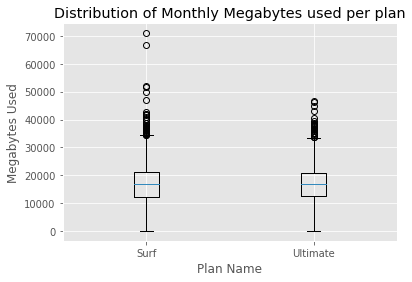

Surf Users Mean: 
 16717.702137355584

Surf Users Variance: 
 62168225.746928446

Surf Users Standard Deviation: 
 7884.682983286547
-----------------------------------
Ultimate Users Mean: 
 17238.642253129346

Ultimate Users Variance: 
 61324847.980956204

Ultimate Users Standard Deviation: 
 7831.018323369969


In [41]:
# Plot a boxplot to visualize the distribution of the monthly mb used

#create dataframes taking just the mb_sum field and then filter so the NaN values are removed.
merged_df_surf_mb = merged_df_surf['mb_sum']
merged_df_ult_mb = merged_df_ult['mb_sum']

merged_df_surf_mb_filtered = merged_df_surf_mb[~np.isnan(merged_df_surf_mb)]
merged_df_ult_mb_filtered = merged_df_ult_mb[~np.isnan(merged_df_ult_mb)]

plt.boxplot([merged_df_surf_mb_filtered, merged_df_ult_mb_filtered], labels=['Surf', 'Ultimate'])
plt.title('Distribution of Monthly Megabytes used per plan')
plt.xlabel('Plan Name')
plt.ylabel('Megabytes Used')
plt.show()

#display statistics
statistics('mb_sum')

Based on these two graphs, users of both plans tend to user similar amounts of data each month. Surf has a lower limit of 15000 megabytes and the median is above that. That is a lot of extra charges for Surf users and more revenue for Megaline.

## Revenue

In [42]:
#create a dataframe grouping by plan names and each month and summing the total revenue.
revenue = merged_df.groupby(['plan_name','month'])['total_revenue'].sum().reset_index(name='revenue_per_month').round(2)

#create a transposed pivot
pivot_revenue_df = revenue.pivot(index='plan_name', columns='month', values='revenue_per_month').T

#print(revenue)
display(pivot_revenue_df)

plan_name,surf,ultimate
month,,
1,40.00,280.0
2,309.57,490.0
3,1056.65,896.0
4,2035.53,1533.0
5,3667.37,2051.0
6,4779.80,3367.0
7,7583.56,4242.0
8,10356.85,5173.0
9,11304.67,6195.0


In [43]:
#check if there was really only one user in january that had surf
display(merged_df[['user_id','month','total_revenue']][(merged_df['month'] == 1) & (merged_df['plan'] == 'surf')])

,user_id,month,total_revenue
806,1042,1,20.0
1923,1362,1,20.0


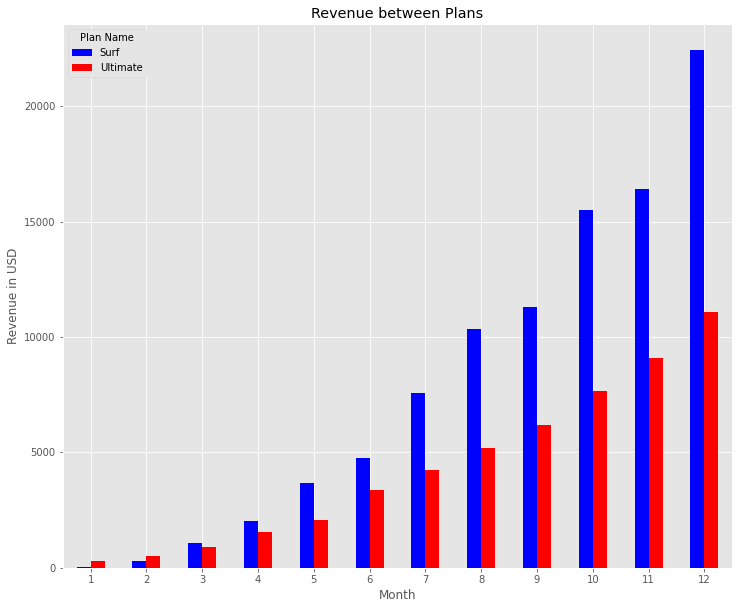

In [44]:
pivot_revenue_df.plot(kind='bar',
                     title='Revenue between Plans',
                     xlabel='Month',
                     rot=0,
                     ylabel='Revenue in USD',
                     figsize=[12,10],
                     color=['Blue','Red'])

plt.legend(title = 'Plan Name',labels=['Surf','Ultimate'])
plt.show()

In [45]:
#amount of users on each plan
merged_df.groupby('plan_name')['user_id'].size()

plan_name
surf        1573
ultimate     720
Name: user_id, dtype: int64

Based on the bar plot, it is clear the Surf plan makes Megaline much more money. It also likely there are more users on Surf which would account for this extra revenue

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

**Null Hypothesis**: The average revenue from users of the Ultimate and Surf calling plans are the same.

**Alternative Hyptohesis**: The average revenue from users of the Ultimate and Surf calling plans differ

In [46]:
#create a dataframe grouping by plan names and each month and summing the total revenue.
revenue_avg_df = merged_df.groupby(['plan_name','month'])['total_revenue'].mean().reset_index(name='revenue_per_month').round(2)

revenue_avg_df_surf = revenue_avg_df[revenue_avg_df.plan_name == 'surf']
revenue_avg_df_ult = revenue_avg_df[revenue_avg_df.plan_name == 'ultimate']

In [47]:
# Test the hypotheses
alpha = .05
#using ttest_ind() because we are testing that the means of the two statistical populations are equal based on samples taken from them
results = stats.ttest_ind(revenue_avg_df_surf['revenue_per_month'],revenue_avg_df_ult['revenue_per_month'], equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.0004968311639298688
We reject the null hypothesis


We conclude here that we can reject the null hypothesis because we have a p value much lower than the alpha. It is clear in the data as well that the average revenue for the 2 plans differ.

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

**Null Hypothesis**:  The average revenue from users in the NY-NJ area is the same as that of users from other regions.

**Alternative Hyptohesis**: The average revenue from users in the NY-NJ area is different from that of the users from the other regions

In [48]:
#create 2 dataframes: one for all the states excluding ny-nj

revenue_by_state = merged_df[merged_df['state'] != ' NY-NJ-PA']

revenue_ny_nj = merged_df[merged_df['state'] == ' NY-NJ-PA']

display(revenue_by_state.sample(5))
print()
display(revenue_ny_nj.sample(5))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,reg_year,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,extra_minutes_cost,extra_internet_cost,extra_messages_cost,total_revenue
2174,1449,Boyd,Kelley,39,Seattle-Tacoma-Bellevue,2018-10-04,surf,NaT,WA,2018,...,20.0,10.0,0.03,0.03,surf,15.0,0.00,10.0,0.00,30.00
1766,1324,Romana,Moore,18,Minneapolis-St. Paul-Bloomington,2018-04-04,surf,NaT,MN-WI,2018,...,20.0,10.0,0.03,0.03,surf,15.0,15.39,30.0,2.22,67.61
1493,1241,Lala,Walls,24,Richmond,2018-08-27,surf,NaT,VA,2018,...,20.0,10.0,0.03,0.03,surf,15.0,0.00,0.0,0.00,20.00
1492,1240,Drema,Lopez,61,Baton Rouge,2018-03-18,surf,NaT,LA,2018,...,20.0,10.0,0.03,0.03,surf,15.0,18.57,260.0,0.00,298.57
743,1009,Gerry,Little,19,San Jose-Sunnyvale-Santa Clara,2018-04-22,surf,NaT,CA,2018,...,20.0,10.0,0.03,0.03,surf,15.0,1.02,50.0,0.00,71.02


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,reg_year,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,extra_minutes_cost,extra_internet_cost,extra_messages_cost,total_revenue
1900,1358,Vaughn,Maldonado,20,New York-Newark-Jersey City,2018-04-26,surf,2018-10-22,NY-NJ-PA,2018,...,20.0,10.0,0.03,0.03,surf,15.0,0.00,20.0,0.0,40.00
562,1407,Tristan,Daugherty,27,New York-Newark-Jersey City,2018-11-29,ultimate,NaT,NY-NJ-PA,2018,...,70.0,7.0,0.01,0.01,ultimate,30.0,0.00,0.0,0.0,70.00
30,1031,Lane,Martin,52,New York-Newark-Jersey City,2018-07-15,ultimate,NaT,NY-NJ-PA,2018,...,70.0,7.0,0.01,0.01,ultimate,30.0,0.00,0.0,0.0,70.00
2049,1402,Jesus,Berry,25,New York-Newark-Jersey City,2018-06-11,surf,2018-12-26,NY-NJ-PA,2018,...,20.0,10.0,0.03,0.03,surf,15.0,0.00,0.0,0.0,20.00
2128,1434,Kai,Barr,18,New York-Newark-Jersey City,2018-03-06,surf,NaT,NY-NJ-PA,2018,...,20.0,10.0,0.03,0.03,surf,15.0,0.42,0.0,0.0,20.42


In [49]:
# Test the hypotheses. Note: Assuming I'm comparing with the NY-NJ-PA value since there is no NY-NJ.

#using ttest_ind() because we are testing that the means of the two statistical populations are equal based on samples taken from them

results = stats.ttest_ind(revenue_by_state['total_revenue'],revenue_ny_nj['total_revenue'],equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.033525615885300314
We reject the null hypothesis


We can conclude here that we can reject the null hypothesis because the p value is lower than the alpha. This is clear in the data as well.

## General conclusion

 - The data we got was in pretty good shape. I just needed to fix a couple data types and split some columns up in the users dataframe
 - I aggregated the user data into a few different dataframes ranging from average revenue by user, revenue by plan, revenue by state.
 - I created a huge merged dataframe called merged_df that contained the amount of minutes, messages, and data users used along with how much revenue each user generated. I used this dataframe to create other aggregated dataframes that were essential to analysis such as comparing the number of messages users of each plan tend to send each month
 - I then used this dataframe to create revenue_by_state, revenue_ny_nj, and revenue_avg_df that helped me run hypothesis tests on the average revenue from users of the Ultimate and Surf plans and the average revenue between New York/New Jeresey users and the rest of the country.
 
 
 ## Findings
I found in my two hypothesis tests that the average revenue from users of the Ultimate and Surf plans is likely to differ and the average revenue between New York/New Jeresey users and the rest of the country is likely to differ as well.
My biggest finding was that the Surf plan brings in the most revenue for the client. Users tend to go for the cheaper option, and then overdraft on their data usage limitations.

We saw that the Surf users bring in more money for Megaline, but they also account for a big majority of the userbase (1180 vs. 579). The cheap base price of the plan definitely results in this difference because customers will typically want to go for the cheaper base price. 

What we learned from the data is that even though users will go for the cheaper base price plan, they are not good at staying within the limitations of their plan which results in overage charges and even more revenue for Megaline.

If you look at the average revenue by plan by month, we can see that the average ultimate user will bring in more money for Megaline, but more customers will pick the Surf for it's cheaper price. If the Ultimate plan wasn't so much more expensive than Surf, more users may sign up for it.